<a href="https://colab.research.google.com/github/Latamila/Mineracao/blob/main/FundosImobiliarios_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pandas-profiling
#!pip install --upgrade pandas-profiling
# importa a função da biblioteca
#from pandas_profiling import ProfileReport

In [2]:
#import seaborn as sns

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving fii070124.xlsx to fii070124 (1).xlsx


In [5]:
fii = pd.read_excel('fii070124.xlsx')

In [65]:
fii= pd.read_excel('fii070124.xlsx',
                          names = ['ticker',
                                   'preco',
                                   'ultimoDividendo',
                                   'dy',
                                   'valorPatrimonial',
                                   'pVp',
                                   'liquidezDiaria',
                                   'percentualCaixa',
                                   'dividendos3anos',
                                   'valorCora3anos',
                                   'patrimonio',
                                   'nCotistas',
                                   'gestao',
                                   'nCotas'])

**vou dar uma olhada nos dados.**

In [66]:
fii.head()

,ticker,preco,ultimoDividendo,dy,valorPatrimonial,pVp,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
0,ABCP11,72.19,0.650000,8.93,91.88,0.79,75521.32,1.68,8.43,-0.84,4.326774e+08,17274.0,Passiva,4709082
1,AFHI11,100.98,1.000000,12.56,96.43,1.05,856882.27,3.69,NaN,NaN,3.223600e+08,26665.0,Ativa,3343095
2,AIEC11,55.80,1.330000,16.43,95.16,0.59,885870.91,2.65,8.80,-16.22,4.591686e+08,16416.0,Ativa,4824987
3,ALMI11,690.00,0.371133,0.00,2039.72,0.34,16769.47,3.34,NaN,-19.12,2.267702e+08,2260.0,Passiva,111177
4,ALZC11,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000


In [67]:
fii.shape

(479, 14)

In [68]:
fii

,ticker,preco,ultimoDividendo,dy,valorPatrimonial,pVp,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
0,ABCP11,72.19,0.650000,8.93,91.88,0.79,75521.32,1.68,8.43,-0.84,4.326774e+08,17274.0,Passiva,4709082
1,AFHI11,100.98,1.000000,12.56,96.43,1.05,856882.27,3.69,NaN,NaN,3.223600e+08,26665.0,Ativa,3343095
2,AIEC11,55.80,1.330000,16.43,95.16,0.59,885870.91,2.65,8.80,-16.22,4.591686e+08,16416.0,Ativa,4824987
3,ALMI11,690.00,0.371133,0.00,2039.72,0.34,16769.47,3.34,NaN,-19.12,2.267702e+08,2260.0,Passiva,111177
4,ALZC11,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,XPPR11,22.17,0.100000,6.31,69.48,0.32,445428.32,2.72,-39.04,-35.05,5.083487e+08,55515.0,Ativa,7316171
475,XPSF11,8.37,0.075000,10.86,8.47,0.99,664205.23,1.05,0.90,-4.47,3.669000e+08,59102.0,Ativa,43302140
476,YUFI11,87.99,0.389271,2.89,102.44,0.86,351.00,2.78,NaN,NaN,5.046470e+07,60.0,Ativa,492650
477,ZAVI11,129.16,1.240000,10.48,134.97,0.96,332102.05,4.04,NaN,NaN,1.583665e+08,4790.0,Ativa,1173322


Criar variavel que calcula o comportamento(incremento ou decremento) do dividendo3anos + comportamento(incremento ou decremento) do valorcora3anos.

In [69]:
fii['ValoRemuneracao_3anos'] = fii['dividendos3anos'] + fii['valorCora3anos']

criar outra variavel para explicar a taxa de retorno do investimento feito por cota.

In [70]:
fii['MaisRetornoPrecoPago'] = fii['ultimoDividendo'] / fii['preco']*100

In [71]:
'''
Tomei a decisão de considerar que a valorização tanto da cota como dos dividen-
dos são um incremento de oportunidade para o PVP. Por isso, vou considerar a
valorização como um DESCONTO DE OPORTUNIDADE por ser uma cota em potencial
em longo prazo.
'''
fii['Oportunidade'] = fii['pVp'] - fii['ValoRemuneracao_3anos']/100

In [72]:
fii = fii[['ticker','Oportunidade',
           'MaisRetornoPrecoPago',
           'ValoRemuneracao_3anos',
                 'preco',
                 'ultimoDividendo',
                 'dy',
                 'pVp',
                 'valorPatrimonial',
                 'liquidezDiaria',
                 'percentualCaixa',
                 'dividendos3anos',
                 'valorCora3anos',
                 'patrimonio',
                 'nCotistas',
                 'gestao',
                 'nCotas']]

In [73]:
fii

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
0,ABCP11,0.7141,0.900402,7.59,72.19,0.650000,8.93,0.79,91.88,75521.32,1.68,8.43,-0.84,4.326774e+08,17274.0,Passiva,4709082
1,AFHI11,NaN,0.990295,NaN,100.98,1.000000,12.56,1.05,96.43,856882.27,3.69,NaN,NaN,3.223600e+08,26665.0,Ativa,3343095
2,AIEC11,0.6642,2.383513,-7.42,55.80,1.330000,16.43,0.59,95.16,885870.91,2.65,8.80,-16.22,4.591686e+08,16416.0,Ativa,4824987
3,ALMI11,NaN,0.053787,NaN,690.00,0.371133,0.00,0.34,2039.72,16769.47,3.34,NaN,-19.12,2.267702e+08,2260.0,Passiva,111177
4,ALZC11,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,XPPR11,1.0609,0.451060,-74.09,22.17,0.100000,6.31,0.32,69.48,445428.32,2.72,-39.04,-35.05,5.083487e+08,55515.0,Ativa,7316171
475,XPSF11,1.0257,0.896057,-3.57,8.37,0.075000,10.86,0.99,8.47,664205.23,1.05,0.90,-4.47,3.669000e+08,59102.0,Ativa,43302140
476,YUFI11,NaN,0.442404,NaN,87.99,0.389271,2.89,0.86,102.44,351.00,2.78,NaN,NaN,5.046470e+07,60.0,Ativa,492650
477,ZAVI11,NaN,0.960050,NaN,129.16,1.240000,10.48,0.96,134.97,332102.05,4.04,NaN,NaN,1.583665e+08,4790.0,Ativa,1173322


In [74]:
fii.sort_values(by='Oportunidade', ascending=True)

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
190,HMOC11,-0.2822,10.486891,123.22,226.95,23.800000,0.00,0.95,238.79,NaN,0.67,122.18,1.04,9.122353e+07,209.0,Passiva,382017
291,ONEF11,0.0118,16.247563,83.82,200.03,32.500000,21.76,0.85,236.65,114431.47,0.94,72.76,11.06,2.155843e+08,2637.0,Passiva,911000
324,RBBV11,0.2152,0.224057,77.48,100.00,0.224057,0.00,0.99,100.84,NaN,1.01,75.40,2.08,1.264702e+08,3475.0,Passiva,1254164
317,PRSV11,0.2815,2.700000,0.85,60.00,1.620000,0.00,0.29,205.75,3691.65,4.56,28.92,-28.07,4.012130e+07,954.0,Passiva,195000
335,RBRD11,0.3332,0.842627,27.68,40.35,0.340000,10.66,0.61,65.91,34371.50,3.15,46.70,-19.02,1.220563e+08,8893.0,Passiva,1851786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,WSEC11,NaN,1.428742,NaN,83.99,1.200000,16.18,0.83,101.02,14021.36,10.41,NaN,NaN,2.481536e+07,467.0,Ativa,245651
468,XBXO11,NaN,NaN,NaN,0.00,NaN,0.00,NaN,94.92,NaN,0.01,NaN,NaN,2.888101e+08,6.0,Ativa,3042600
476,YUFI11,NaN,0.442404,NaN,87.99,0.389271,2.89,0.86,102.44,351.00,2.78,NaN,NaN,5.046470e+07,60.0,Ativa,492650
477,ZAVI11,NaN,0.960050,NaN,129.16,1.240000,10.48,0.96,134.97,332102.05,4.04,NaN,NaN,1.583665e+08,4790.0,Ativa,1173322


In [75]:
df = fii[(fii['ValoRemuneracao_3anos'] > 0)]

In [76]:
df = df[(df['pVp'] > 0.5)]


In [77]:
df = df[(df['liquidezDiaria'] > 100000)]


In [78]:
df = df[(df['nCotistas'] > 2700)]

In [79]:
df.sort_values(by='Oportunidade', ascending=True)

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
375,SADI11,0.5223,1.149944,40.77,88.70,1.020000,13.74,0.93,95.81,473411.91,2.95,38.89,1.88,1.483807e+08,10668.0,Ativa,1548684
315,PQDP11,0.5656,0.962951,4.44,1918.01,18.469502,10.76,0.61,3147.05,130592.00,1.90,18.20,-13.76,7.726425e+08,4005.0,Passiva,245513
230,KNCR11,0.6164,0.978682,40.36,103.20,1.010000,12.97,1.02,100.80,9431601.68,4.80,35.02,5.34,5.755606e+09,304408.0,Ativa,57097087
220,JRDM11,0.6207,0.465658,34.93,85.90,0.400000,4.40,0.97,88.84,610682.00,0.41,28.90,6.03,2.241432e+08,4001.0,Passiva,2522968
131,FIGS11,0.6245,0.736498,17.55,61.10,0.450000,8.85,0.80,76.28,146309.05,0.76,20.92,-3.37,2.174106e+08,14685.0,Passiva,2850000
179,HGBS11,0.6709,0.873439,34.91,228.98,2.000000,8.78,1.02,224.62,5976671.55,15.74,32.97,1.94,2.859311e+09,102934.0,Ativa,12729800
436,VGIR11,0.6883,1.115619,32.17,9.86,0.110000,14.71,1.01,9.76,4108821.18,5.93,27.59,4.58,1.007495e+09,230050.0,Ativa,103220707
446,VLOL11,0.7476,1.894328,13.24,98.00,1.856441,3.86,0.88,111.06,160238.13,16.46,14.56,-1.32,1.982191e+08,3127.0,Passiva,1784828
283,NEWL11,0.7695,1.110731,8.05,117.04,1.300000,10.31,0.85,137.14,1126415.55,2.98,4.33,3.72,2.788284e+08,3876.0,Ativa,2033099
184,HGPO11,0.7880,0.523981,17.20,286.27,1.500000,6.57,0.96,298.84,679828.91,0.45,8.97,8.23,5.238763e+08,17927.0,Passiva,1753057


In [80]:
df.sort_values(by='nCotistas', ascending=False)

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
279,MXRF11,0.9334,1.038716,13.66,10.59,0.110000,13.03,1.07,9.86,12811692.18,1.48,13.25,0.41,2.555879e+09,999290.0,Ativa,259279007
473,XPML11,0.8088,0.783358,22.12,114.89,0.900000,8.70,1.03,111.91,14679585.36,16.83,22.47,-0.35,3.449365e+09,396609.0,Ativa,30822213
472,XPLG11,0.9527,0.709607,4.73,109.92,0.780000,8.35,1.00,110.14,9764696.95,11.04,7.69,-2.96,3.282308e+09,314755.0,Ativa,29613233
230,KNCR11,0.6164,0.978682,40.36,103.20,1.010000,12.97,1.02,100.80,9431601.68,4.80,35.02,5.34,5.755606e+09,304408.0,Ativa,57097087
441,VISC11,0.8305,0.828363,21.95,120.72,1.000000,8.80,1.05,115.07,6113822.50,9.19,20.83,1.12,2.444560e+09,271018.0,Ativa,21243688
236,KNRI11,0.9060,0.608125,12.40,164.44,1.000000,7.37,1.03,159.71,3657963.27,1.23,11.47,0.93,3.858210e+09,262554.0,Ativa,24157121
63,BTLG11,1.0370,0.731543,1.30,103.89,0.760000,8.66,1.05,99.06,7631253.68,30.16,3.36,-2.06,2.822378e+09,260030.0,Ativa,28492634
436,VGIR11,0.6883,1.115619,32.17,9.86,0.110000,14.71,1.01,9.76,4108821.18,5.93,27.59,4.58,1.007495e+09,230050.0,Ativa,103220707
187,HGRU11,0.9721,1.677363,13.79,137.12,2.300000,8.88,1.11,123.67,3759936.82,3.83,11.92,1.87,2.276270e+09,207981.0,Ativa,18406458
198,HSML11,0.8188,0.792906,20.12,95.85,0.760000,9.24,1.02,94.34,3364426.82,3.88,20.14,-0.02,1.488817e+09,166127.0,Ativa,15780613


In [81]:
  df.sort_values(by='MaisRetornoPrecoPago', ascending=False)

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
300,PATC11,0.8675,4.415584,4.25,38.50,1.700000,19.82,0.91,42.34,531680.36,6.45,27.63,-23.38,1.472390e+08,7038.0,Ativa,3477434
200,HTMX11,0.8768,1.990253,38.32,163.51,3.254262,15.24,1.26,129.55,2436177.23,10.71,28.96,9.36,1.948813e+08,30859.0,Ativa,1504334
446,VLOL11,0.7476,1.894328,13.24,98.00,1.856441,3.86,0.88,111.06,160238.13,16.46,14.56,-1.32,1.982191e+08,3127.0,Passiva,1784828
187,HGRU11,0.9721,1.677363,13.79,137.12,2.300000,8.88,1.11,123.67,3759936.82,3.83,11.92,1.87,2.276270e+09,207981.0,Ativa,18406458
423,TRXF11,0.9584,1.514207,12.16,112.27,1.700000,10.11,1.08,103.83,10270101.50,11.69,8.89,3.27,1.377838e+09,117516.0,Ativa,13269951
71,CACR11,0.9651,1.450269,4.49,102.05,1.480000,17.12,1.01,100.82,1504116.45,24.96,6.36,-1.87,3.855297e+08,18870.0,NaN,3823767
375,SADI11,0.5223,1.149944,40.77,88.70,1.020000,13.74,0.93,95.81,473411.91,2.95,38.89,1.88,1.483807e+08,10668.0,Ativa,1548684
330,RBHG11,0.9099,1.136118,10.01,92.42,1.050000,13.63,1.01,91.08,350193.55,2.18,7.54,2.47,1.573472e+08,9775.0,Ativa,1727582
436,VGIR11,0.6883,1.115619,32.17,9.86,0.110000,14.71,1.01,9.76,4108821.18,5.93,27.59,4.58,1.007495e+09,230050.0,Ativa,103220707
218,JPPA11,0.9002,1.115042,4.98,93.27,1.040000,16.00,0.95,97.79,198887.09,3.81,6.45,-1.47,8.840904e+07,9137.0,Ativa,904050


In [82]:
df.sort_values(by='dy', ascending=False)

,ticker,Oportunidade,MaisRetornoPrecoPago,ValoRemuneracao_3anos,preco,ultimoDividendo,dy,pVp,valorPatrimonial,liquidezDiaria,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotistas,gestao,nCotas
300,PATC11,0.8675,4.415584,4.25,38.50,1.700000,19.82,0.91,42.34,531680.36,6.45,27.63,-23.38,1.472390e+08,7038.0,Ativa,3477434
71,CACR11,0.9651,1.450269,4.49,102.05,1.480000,17.12,1.01,100.82,1504116.45,24.96,6.36,-1.87,3.855297e+08,18870.0,NaN,3823767
218,JPPA11,0.9002,1.115042,4.98,93.27,1.040000,16.00,0.95,97.79,198887.09,3.81,6.45,-1.47,8.840904e+07,9137.0,Ativa,904050
200,HTMX11,0.8768,1.990253,38.32,163.51,3.254262,15.24,1.26,129.55,2436177.23,10.71,28.96,9.36,1.948813e+08,30859.0,Ativa,1504334
436,VGIR11,0.6883,1.115619,32.17,9.86,0.110000,14.71,1.01,9.76,4108821.18,5.93,27.59,4.58,1.007495e+09,230050.0,Ativa,103220707
42,BNFS11,1.2349,1.044083,7.51,120.51,1.258224,14.21,1.31,91.89,175404.18,6.30,8.32,-0.81,6.432125e+07,5119.0,Ativa,700000
295,OUJP11,0.8885,0.923077,10.15,97.50,0.900000,14.05,0.99,98.04,566583.36,9.01,12.72,-2.57,3.188754e+08,29388.0,Ativa,3252384
345,RBRY11,0.9267,0.993641,9.33,100.64,1.000000,13.96,1.02,98.39,2943714.95,31.84,11.20,-1.87,9.883103e+08,49753.0,Ativa,10044607
375,SADI11,0.5223,1.149944,40.77,88.70,1.020000,13.74,0.93,95.81,473411.91,2.95,38.89,1.88,1.483807e+08,10668.0,Ativa,1548684
413,TGAR11,1.0602,1.091902,1.98,120.89,1.320000,13.64,1.08,111.49,7032857.73,36.83,5.31,-3.33,1.536775e+09,124930.0,Ativa,13784500


In [83]:
df = df[(df['dy'] > 8)]

In [84]:
df = df[['ticker','dy',
           'MaisRetornoPrecoPago',
           'Oportunidade',
           'ValoRemuneracao_3anos',
                 'preco',
                 'ultimoDividendo',
                 'pVp',
                 'liquidezDiaria',
                 'nCotistas',
                 'valorPatrimonial',
                 'percentualCaixa',
                 'dividendos3anos',
                 'valorCora3anos',
                 'patrimonio',
                 'gestao',
                 'nCotas']]

In [85]:
df.sort_values(by='Oportunidade', ascending=True)

,ticker,dy,MaisRetornoPrecoPago,Oportunidade,ValoRemuneracao_3anos,preco,ultimoDividendo,pVp,liquidezDiaria,nCotistas,valorPatrimonial,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,gestao,nCotas
375,SADI11,13.74,1.149944,0.5223,40.77,88.70,1.020000,0.93,473411.91,10668.0,95.81,2.95,38.89,1.88,1.483807e+08,Ativa,1548684
315,PQDP11,10.76,0.962951,0.5656,4.44,1918.01,18.469502,0.61,130592.00,4005.0,3147.05,1.90,18.20,-13.76,7.726425e+08,Passiva,245513
230,KNCR11,12.97,0.978682,0.6164,40.36,103.20,1.010000,1.02,9431601.68,304408.0,100.80,4.80,35.02,5.34,5.755606e+09,Ativa,57097087
131,FIGS11,8.85,0.736498,0.6245,17.55,61.10,0.450000,0.80,146309.05,14685.0,76.28,0.76,20.92,-3.37,2.174106e+08,Passiva,2850000
179,HGBS11,8.78,0.873439,0.6709,34.91,228.98,2.000000,1.02,5976671.55,102934.0,224.62,15.74,32.97,1.94,2.859311e+09,Ativa,12729800
436,VGIR11,14.71,1.115619,0.6883,32.17,9.86,0.110000,1.01,4108821.18,230050.0,9.76,5.93,27.59,4.58,1.007495e+09,Ativa,103220707
283,NEWL11,10.31,1.110731,0.7695,8.05,117.04,1.300000,0.85,1126415.55,3876.0,137.14,2.98,4.33,3.72,2.788284e+08,Ativa,2033099
254,MALL11,8.22,0.681373,0.8012,17.88,117.41,0.800000,0.98,1992776.32,131412.0,119.22,1.63,13.85,4.03,1.087825e+09,Ativa,9124659
473,XPML11,8.70,0.783358,0.8088,22.12,114.89,0.900000,1.03,14679585.36,396609.0,111.91,16.83,22.47,-0.35,3.449365e+09,Ativa,30822213
198,HSML11,9.24,0.792906,0.8188,20.12,95.85,0.760000,1.02,3364426.82,166127.0,94.34,3.88,20.14,-0.02,1.488817e+09,Ativa,15780613


In [86]:
df = df[(df['preco'] < 200)]

In [87]:
df.sort_values(by='preco', ascending=True)

,ticker,dy,MaisRetornoPrecoPago,Oportunidade,ValoRemuneracao_3anos,preco,ultimoDividendo,pVp,liquidezDiaria,nCotistas,valorPatrimonial,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,gestao,nCotas
436,VGIR11,14.71,1.115619,0.6883,32.17,9.86,0.110000,1.01,4108821.18,230050.0,9.76,5.93,27.59,4.58,1.007495e+09,Ativa,103220707
279,MXRF11,13.03,1.038716,0.9334,13.66,10.59,0.110000,1.07,12811692.18,999290.0,9.86,1.48,13.25,0.41,2.555879e+09,Ativa,259279007
300,PATC11,19.82,4.415584,0.8675,4.25,38.50,1.700000,0.91,531680.36,7038.0,42.34,6.45,27.63,-23.38,1.472390e+08,Ativa,3477434
131,FIGS11,8.85,0.736498,0.6245,17.55,61.10,0.450000,0.80,146309.05,14685.0,76.28,0.76,20.92,-3.37,2.174106e+08,Passiva,2850000
211,ITIT11,9.11,0.811153,0.9038,2.62,78.90,0.640000,0.93,222288.59,9808.0,84.55,1.51,8.95,-6.33,7.613842e+07,Passiva,900494
181,HGFF11,9.15,0.795274,0.8970,6.30,88.02,0.700000,0.96,771037.50,16406.0,91.67,6.40,8.06,-1.76,2.625185e+08,Ativa,2863597
375,SADI11,13.74,1.149944,0.5223,40.77,88.70,1.020000,0.93,473411.91,10668.0,95.81,2.95,38.89,1.88,1.483807e+08,Ativa,1548684
305,PLCR11,12.89,0.900698,0.9601,0.99,88.82,0.800000,0.97,321142.91,17090.0,91.86,11.15,2.44,-1.45,1.937535e+08,Ativa,2109169
243,LGCP11,8.59,0.798226,0.8564,2.36,90.20,0.720000,0.88,615329.82,15633.0,102.39,1.23,5.77,-3.41,3.613967e+08,Ativa,3529735
341,RBRR11,10.88,0.714364,0.9532,0.68,90.99,0.650000,0.96,3036003.86,137838.0,95.26,9.86,2.11,-1.43,1.434344e+09,Ativa,15057201


In [88]:
df.sort_values(by='MaisRetornoPrecoPago', ascending=False)

,ticker,dy,MaisRetornoPrecoPago,Oportunidade,ValoRemuneracao_3anos,preco,ultimoDividendo,pVp,liquidezDiaria,nCotistas,valorPatrimonial,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,gestao,nCotas
300,PATC11,19.82,4.415584,0.8675,4.25,38.50,1.700000,0.91,531680.36,7038.0,42.34,6.45,27.63,-23.38,1.472390e+08,Ativa,3477434
200,HTMX11,15.24,1.990253,0.8768,38.32,163.51,3.254262,1.26,2436177.23,30859.0,129.55,10.71,28.96,9.36,1.948813e+08,Ativa,1504334
187,HGRU11,8.88,1.677363,0.9721,13.79,137.12,2.300000,1.11,3759936.82,207981.0,123.67,3.83,11.92,1.87,2.276270e+09,Ativa,18406458
423,TRXF11,10.11,1.514207,0.9584,12.16,112.27,1.700000,1.08,10270101.50,117516.0,103.83,11.69,8.89,3.27,1.377838e+09,Ativa,13269951
71,CACR11,17.12,1.450269,0.9651,4.49,102.05,1.480000,1.01,1504116.45,18870.0,100.82,24.96,6.36,-1.87,3.855297e+08,NaN,3823767
375,SADI11,13.74,1.149944,0.5223,40.77,88.70,1.020000,0.93,473411.91,10668.0,95.81,2.95,38.89,1.88,1.483807e+08,Ativa,1548684
330,RBHG11,13.63,1.136118,0.9099,10.01,92.42,1.050000,1.01,350193.55,9775.0,91.08,2.18,7.54,2.47,1.573472e+08,Ativa,1727582
436,VGIR11,14.71,1.115619,0.6883,32.17,9.86,0.110000,1.01,4108821.18,230050.0,9.76,5.93,27.59,4.58,1.007495e+09,Ativa,103220707
218,JPPA11,16.00,1.115042,0.9002,4.98,93.27,1.040000,0.95,198887.09,9137.0,97.79,3.81,6.45,-1.47,8.840904e+07,Ativa,904050
283,NEWL11,10.31,1.110731,0.7695,8.05,117.04,1.300000,0.85,1126415.55,3876.0,137.14,2.98,4.33,3.72,2.788284e+08,Ativa,2033099


In [89]:
df.describe()

,dy,MaisRetornoPrecoPago,Oportunidade,ValoRemuneracao_3anos,preco,ultimoDividendo,pVp,liquidezDiaria,nCotistas,valorPatrimonial,percentualCaixa,dividendos3anos,valorCora3anos,patrimonio,nCotas
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,4.400000e+01
mean,11.223864,1.041943,0.907952,10.522955,100.799773,1.017216,1.013182,3.058318e+06,111505.159091,99.214545,8.092045,11.634091,-1.111136,1.122731e+09,1.810763e+07
std,2.804802,0.585583,0.126083,10.572065,28.463302,0.512748,0.089124,3.622370e+06,169478.626820,25.475005,8.739131,8.822555,4.653422,1.153748e+09,4.117373e+07
min,8.010000,0.681373,0.522300,0.310000,9.860000,0.110000,0.800000,1.463090e+05,3409.000000,9.760000,0.510000,2.110000,-23.380000,6.432125e+07,7.000000e+05
25%,8.872500,0.789839,0.874475,3.145000,92.705000,0.775000,0.967500,5.578576e+05,14302.250000,95.250000,2.322500,6.427500,-2.667500,2.619130e+08,2.792430e+06
50%,10.360000,0.919513,0.924650,7.490000,103.645000,0.900000,1.015000,1.523730e+06,48863.000000,100.810000,5.100000,8.605000,-1.440000,9.979025e+08,9.077925e+06
75%,13.180000,1.058839,0.970750,13.692500,116.095000,1.062500,1.050000,3.783363e+06,133018.500000,111.595000,10.760000,12.852500,0.940000,1.545270e+09,1.514743e+07
max,19.820000,4.415584,1.234900,40.770000,163.510000,3.254262,1.310000,1.467959e+07,999290.000000,143.440000,36.830000,38.890000,9.360000,5.755606e+09,2.592790e+08


In [90]:
import seaborn as sns

##VISUALIZAÇÃO DE DADOS
Neste grafico se observa o dividendo yield, com a distinção de cores para o
preço

In [95]:
import plotly.express as px

fig = px.scatter(df, y="dy", x="ticker", color="preco", symbol="Oportunidade")
fig.update_traces(marker_size=10)
fig.show()

In [96]:
fig = px.box(df, x="gestao", y="dy", color="gestao")
fig.show()

In [97]:
fig = px.violin(df, x="gestao", y="MaisRetornoPrecoPago", color="gestao")
fig.show()

In [100]:
fig = px.bar(x=df['ticker'], y=df['ValoRemuneracao_3anos'])
fig.update_xaxes(showgrid=True, ticks="outside")
fig.show()

In [106]:
fig = px.bar(x=df['ticker'], y=df['dy'])
fig.update_xaxes(showgrid=True, ticks="outside", tickson="boundaries")
fig.show()

In [103]:
fig = px.bar(x=df['ticker'], y=df['Oportunidade'])
fig.update_xaxes(showgrid=True, ticks="outside")
fig.show()

In [105]:
fig = px.bar(x=df['ticker'], y=df['nCotistas'])
fig.update_xaxes(showgrid=True, ticks="outside",tickson="boundaries")
fig.show()

In [112]:
fig = px.scatter(df.query("dy > 8"), x="preco", y="ValoRemuneracao_3anos",
	         size="MaisRetornoPrecoPago", color="gestao",
                 hover_name="ticker", log_x=True, size_max=60)
fig.show()

##VISUALIZAÇÃO DAS OPORTUNIDADES COM A COR BASEADA NO DIVIDEND YELD E O TAMANHO DA BOLHA BASEADO NO PREÇO

In [117]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=df['ticker'],
    y=df['Oportunidade'],
    mode='markers',
    marker=dict(
        color=df['dy'],
        size=df['preco'],
        showscale=True
        )
)])
fig.show()

<ipython-input-92-c90fcbb0712a>:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



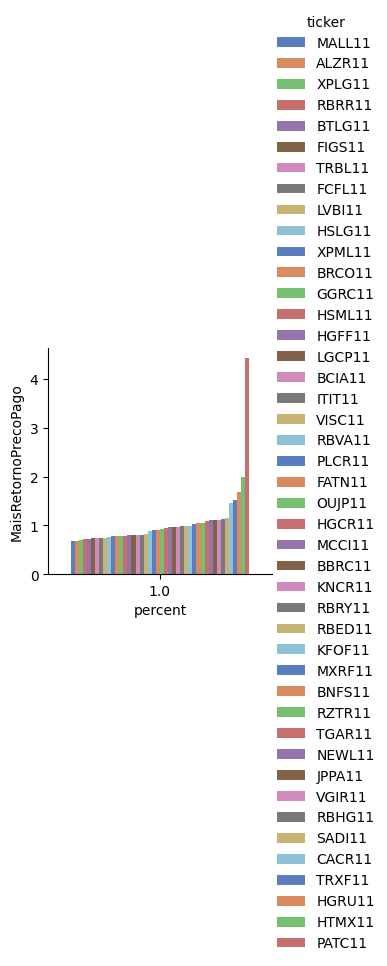

In [92]:
#associação de pVp e classe de fii_class
#agrupamento
pvp_count = df[['MaisRetornoPrecoPago','ticker']].groupby(['MaisRetornoPrecoPago','ticker']).size()

#calculo de percentual
pvp_count_percent = pvp_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()

#columns
pvp_count_percent.columns = ['MaisRetornoPrecoPago','ticker', 'percent']

#catplot
sns.catplot(y='MaisRetornoPrecoPago',
            x = 'percent',
            hue = 'ticker',
            data = pvp_count_percent,
            height = 3,
            kind = 'bar',
            palette = 'muted')

<ipython-input-93-4deb1bcd9c3d>:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



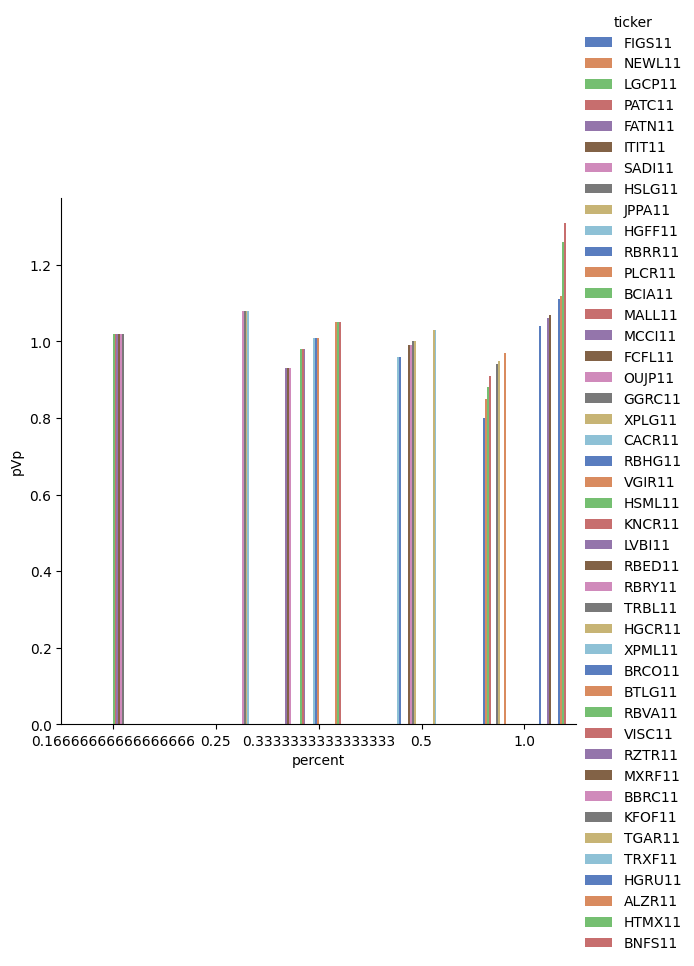

In [93]:

#associação de ticker com outras variaveis
#agrupamento
pvp_count = df[['pVp','ticker']].groupby(['pVp','ticker']).size()

#calculo de percentual
pvp_count_percent = pvp_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()

#columns
pvp_count_percent.columns = ['pVp','ticker', 'percent']

#catplot
sns.catplot(y='pVp',
            x = 'percent',
            hue = 'ticker',
            data = pvp_count_percent,
            height = 6,
            kind = 'bar',
            palette = 'muted')

<ipython-input-65-d77982977151>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pvp_count_percent = pvp_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()


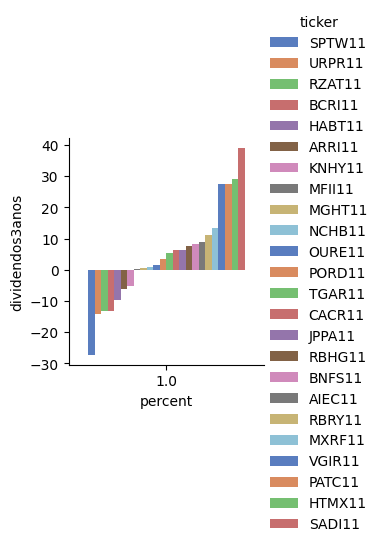

In [65]:
#0associação de pVp e classe de fii_class
#agrupamento
pvp_count = df[['dividendos3anos','ticker']].groupby(['dividendos3anos','ticker']).size()

#calculo de percentual
pvp_count_percent = pvp_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()

#columns
pvp_count_percent.columns = ['dividendos3anos','ticker', 'percent']

#catplot
sns.catplot(y='dividendos3anos',
            x = 'percent',
            hue = 'ticker',
            data = pvp_count_percent,
            height = 3,
            kind = 'bar',
            palette = 'muted')

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0e66be6cc9688c747f8e30797bc6996853dee587bce5d7d86784e33b2a21cbb0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# executa a função que gera o relatório
profile = ProfileReport(df, title="Fundos Imobiliarios")
# visualização do relatório
profile


Em estatística descritiva, a curtose é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade. É usualmente definida como: é o quarto momento central e σ é o desvio-padrão.

Se o valor é > 0 (ou > 3), então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)

OBSERVEI NO MAPA HEATMAP QUE


> QUANTO MAIOR É O PREÇO MENOR SERIA O VALOR DO RETORNO POR PREÇO PAGO



> POSSIVELMENTE MAIOR DIVIDENDO ELEVA O VALOR DO RETORNO POR PREÇO PAGO.



> A MEDIDA QUE O PVP ELEVA, TAMBEM AUMENTA LEVEMENTE O RETORNO MENSAL, REMUNERAÇÃO TRIENAL E O DY.







In [ ]:
df.sort_values(by='preco', ascending=True)

In [ ]:
df = df[['ticker',
           'dy',
           'MaisRetornoPrecoPago',
           'menorPontosMelhor',
           'preco',
           'pVp']]

In [ ]:
df.sort_values(by='MaisRetornoPrecoPago', ascending=False)

In [ ]:
df = df.sort_values(by='menorPontosMelhor', ascending=True)

In [ ]:
df.sort_values(by='dy', ascending=False)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

In [ ]:
df= df[(df['menorPontosMelhor'] < 0)]

In [ ]:
df

In [ ]:
# executa a função que gera o relatório
#profile = ProfileReport(fii, title="Fundos Imobiliarios")
# visualização do relatório
#profile

In [ ]:
#profile.to_file("index.html")

In [ ]:
#profile.to_file("arquivo.json")


In [ ]:
fii.to_excel('fii_conservador.xlsx', index=False)

A PARTIR DESTE PONTO ABRA O VSCODE

SALVE O ANALISEFII.HTML

CRIE UM ARQUIVO run-http-server.sh
linha de codigo do arquivo: python3 -m http.server 5000

CRIE ARQUIVO run-ngrok.sh
Linha de codigo do arquivo: ngrok http http://localhost:5000

NO VS CODE COM UM TERMINAL LINUX DIGITE:

sh run-http-server.sh

ABRA O SITE DO NGROK, CADASTRE E PEGUE UMA CHAVE DE AUTENTICAÇÃO
COPIE O LINK DA AUTENTICAÇÃO NO TERMINAL DO NGROK
SALVARA UM ARQUIVO .YML

NO TERMINAL DO NGROK
DIGITE: ngrok http http://localhost:5000

mostrara no prompt se esta online
em qual conta
onde esta rodando
a interface web
AS URLS PUBLICAS PARA DISPONIBILIZAR SUA PAGINA PARA TODOS.


CONSELHO: FAÇA ISSO VIA DOCKER.

SEGUNDA ESTRATEGICA

In [ ]:
fii = fii[(fii['menorPontosMelhor'] < 100.00)]